# Topics of Sociability and Solidarity in Recollections of  Men and Women who survived Auschwitz-Birkenau



 ### Research Question:

- Were men or women more likely to recall acts of solidarity and sociability when recalling life in Birkenau?

## Load the relevant data

Load the libraries needed to work with the data

In [76]:
import constants
import pandas as pd
import os
from IPython.display import display
%config Completer.use_jedi = False
from tables import *
import pyemma
import networkx as nx
import numpy as np

Set up the paths to data

In [77]:
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = constants.input_directory
feature_map = pd.read_csv(parent+'/'+constants.feature_map)

In [78]:
input_directory = constants.output_data_markov_modelling
input_directory = parent +'/'+ constants.output_data_markov_modelling

In [79]:
p_women = pd.read_csv(input_directory+'complete_w'+'/'+'stationary_probs.csv')
p_men = pd.read_csv(input_directory+'/'+'complete_m'+'/'+'stationary_probs.csv')

pm_model_m = pyemma.load('output/markov_modelling/complete_m'+'/'+'pyemma_model','simple')
state_index_m = pd.read_csv('output/markov_modelling/complete_m/state_index.csv')

pm_model_w = pyemma.load('output/markov_modelling/complete_w'+'/'+'pyemma_model','simple')
state_index_w = pd.read_csv('output/markov_modelling/complete_w/state_index.csv')


p_complete = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

input_directory = parent +'/'+ constants.output_data_report_statistical_analysis
input_file = 'strength_of_association_odds_ratio_complete_w_complete_m.csv'
df_fisher = pd.read_csv(input_directory+input_file)

input_directory_expanded = parent +'/'+ constants.output_data_report_statistical_analysis_expanded
df_fisher_expanded = pd.read_csv(input_directory_expanded+input_file)

In [5]:
def measure_centrality(pm_model,state_index,state_label,centrality_measure_type):
    P = pm_model.P
    gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
    index = state_index[state_index.KeywordLabel==state_label].index[0]
    if centrality_measure_type == "degree":
        centrality = nx.degree_centrality(gP)
    elif (centrality_measure_type=="closeness"):
        centrality = nx.closeness_centrality(gP)
    return ['%s %0.2f'%(node,centrality[node]) for node in centrality][index]


### Identify topics related to sociability in Dataset 1

Identify the topic relating to social relations

In [6]:
social_bonds_w = p_women[p_women.topic_name=='social bonds']['stationary_prob'].values[0]
social_bonds_m = p_men[p_men.topic_name=='social bonds']['stationary_prob'].values[0]

Identify the topic relating to friendship

friends_w = p_women[p_women.topic_name=='friends']['stationary_prob'].values[0]
friends_m = p_men[p_men.topic_name=='friends']['stationary_prob'].values[0]

### Identify topics related to acts of solidarity

In [7]:
aid_giving_w = p_women[p_women.topic_name=='aid giving']['stationary_prob'].values[0]
aid_giving_m = p_men[p_men.topic_name=='aid giving']['stationary_prob'].values[0]

food_sharing_w = p_women[p_women.topic_name=='food sharing']['stationary_prob'].values[0]
food_sharing_m = p_men[p_men.topic_name=='food sharing']['stationary_prob'].values[0]

clothing_provision_w = p_women[p_women.topic_name=='clothing provision']['stationary_prob'].values[0]
clothing_provision_m = p_men[p_men.topic_name=='clothing provision']['stationary_prob'].values[0]

## Verify that menstruation is more probable for women

In [8]:
mens_w = p_women[p_women.topic_name=='menstruation']['stationary_prob'].values[0]
mens_m = p_men[p_men.topic_name=='menstruation']['stationary_prob'].values[0]

In [9]:
mens_w>mens_m

True

In [10]:
mens_w / mens_m

170.39619771289958

## Observation 1

### Qualitative description:

The topic describing various forms of solidarity ("aid giving") is slightly more probable for women than for men if studied through the Markovian framework. Overall, women tend to discuss it more than men. Overall we can see a strong tendency of women discussing aid giving more than men do. It is more significant for women if looked through the traditional Fisher test that compares raw probabilities. 

### Quantitative evidence

In [11]:
print (aid_giving_w/aid_giving_m)

1.061877652979738


In [35]:
print (measure_centrality(pm_model_w,state_index_w,'aid giving','closeness'))

7 0.89


In [36]:
print (measure_centrality(pm_model_m,state_index_m,'aid giving','closeness'))

7 0.80


### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/aid%20giving.png)

### Load the results of Fisher test and odds ratio analysis

In [14]:
display (df_fisher[df_fisher.topic_word=="aid giving"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
18,7,aid giving,0.000024,1.291328,0.774397,1377,506,True


## Observation 2

### Qualitative description:

The topic describing food sharing is more significant for women than for men. The probability that women discuss food sharing is by 20% higher. Fisher test also confirms this.

### Quantitative evidence

print (food_sharing_w/food_sharing_m)

### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/food%20sharing.png)

### Load the results of Fisher test and odds ratio analysis

In [15]:
display (df_fisher_expanded[df_fisher_expanded.topic_word=="food sharing"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
142,353,food sharing,0.012936,1.380406,0.724424,255,83,True


## Observation 3

### Qualitative description:

The topic describing friendship is more significant for women than for men. This is confirmed by the Fisher test. This where we find the biggest difference.

### Quantitative evidence

print (friends_w/friends_m)

### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/friends.png)

### Load the results of Fisher test and odds ratio analysis

In [16]:
display (df_fisher_expanded[df_fisher_expanded.topic_word=="friends"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
49,385,friends,0.000013,1.795836,0.556844,265,67,True


## Observation 4

### Qualitative description:

The topic describing social bonds is more significant for women than for men.

### Quantitative evidence

In [17]:
print (social_bonds_w/social_bonds_m)

1.2891914603894181


In [18]:
print (measure_centrality(pm_model_w,state_index_w,'social bonds','degree'))
print (measure_centrality(pm_model_w,state_index_w,'social bonds','closeness'))

91 1.66
91 0.82


In [19]:
print (measure_centrality(pm_model_m,state_index_m,'social bonds','degree'))
print (measure_centrality(pm_model_m,state_index_m,'social bonds','closeness'))

90 1.42
90 0.77


### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/social%20bonds.png)

### Load the results of Fisher test and odds ratio analysis

In [20]:
display (df_fisher[df_fisher.topic_word=="social bonds"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
17,91,social bonds,0.000016,1.363893,0.733195,886,303,True


## Observation 5

### Qualitative description:

The topic describing clothing provisions is more significant for women than for men.

### Quantitative evidence

print (clothing_provision_w/clothing_provision_m)

### Significance

![title](output/markov_modelling/bootstrap/complete_m_complete_w/clothing%20provision.png)

### Load the results of Fisher test and odds ratio analysis

In [21]:
display (df_fisher_expanded[df_fisher_expanded.topic_word=="clothing provision"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
95,211,clothing provision,0.002598,1.93847,0.515871,104,24,True


## Observation 5

### Qualitative description:

Women and men are equally likely to discuss preferential treatment.

### Quantitative evidence

![title](output/markov_modelling/bootstrap/complete_m_complete_w/preferential%20treatment.png)

In [22]:
display (df_fisher_expanded[df_fisher_expanded.topic_word=="preferential treatment"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
202,572,preferential treatment,0.074166,1.186809,0.842595,449,170,False


## Observation 6

### Qualitative description:

Women and men are equally likely to discuss kapos.

### Quantitative evidence

![title](output/markov_modelling/bootstrap/complete_m_complete_w/kapos.png)

## Observation 7

### Qualitative description:

Women and men are equally likely to discuss stealing.

### Quantitative evidence

![title](output/markov_modelling/bootstrap/complete_m_complete_w/stealing.png)

In [23]:
display (df_fisher[df_fisher.topic_word=="stealing"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
74,92,stealing,0.331269,1.145131,0.873262,211,82,False


## Observation 9

### Qualitative description:

When we look at specific forms of aid giving there is no difference between men and women:
    - employment assistance
    - forced march-related aid giving
    - hiding (aid giving)
    - medical care provision
    - sustenance provision
    - shelter provision
    
 There is difference:
    - clothing provision
    - sustenance provision
    - food sharing

No forms of aid giving is positively correlated with men.

### Quantitative evidence

In [24]:
for row in feature_map[feature_map.CoverTerm=='aid giving'].iterrows():
    label = row[1]['KeywordLabel']
    if len(df_fisher_expanded[df_fisher_expanded.topic_word==label])>0:
        display(df_fisher_expanded[df_fisher_expanded.topic_word==label])
    

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
60,156,aid giving,0.000107,1.279495,0.781558,1187,435,True


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
431,158,aid recipients,0.465998,1.772439,0.564194,16,4,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
105,207,civilian aid givers,0.003871,6.002299,0.166603,27,2,True


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
95,211,clothing provision,0.002598,1.93847,0.515871,104,24,True


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
259,277,employment assistance,0.134882,0.490488,2.038785,10,9,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
201,322,famous aid givers,0.065058,inf,0.0,9,0,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
142,353,food sharing,0.012936,1.380406,0.724424,255,83,True


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
525,383,forced march-related aid giving,0.651481,1.202577,0.831548,38,14,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
263,425,hiding (aid giving),0.136551,1.441276,0.69383,81,25,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
300,439,identity concealment (aid giving),0.211672,0.331392,3.017578,3,4,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
566,459,liberation-related aid giving,0.808486,1.328384,0.752794,15,5,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
568,487,medical care provision,0.821,1.082702,0.923616,66,27,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
354,604,protection,0.306729,0.0,inf,0,1,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
559,629,rescue,0.784977,0.884624,1.130424,10,5,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
526,649,shelter provision,0.660814,1.3286,0.752672,18,6,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
248,674,sustenance provision,0.119694,1.183135,0.845212,341,129,False


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
639,707,transfer-related aid giving,1.0,0.977817,1.022686,42,19,False


## Observation 10

### Qualitative description:

No form of social bond is positively correlated with men; yet, there is no quantitative difference in terms of forced labor companion.


### Quantitative evidence

In [25]:
for row in feature_map[feature_map.CoverTerm=='social bonds'].iterrows():
    label = row[1]['KeywordLabel']
    print (label)
    if len(df_fisher_expanded[df_fisher_expanded.topic_word==label])>=0:
        display(df_fisher_expanded[df_fisher_expanded.topic_word==label])
    else:
        display(df_fisher_expanded['camp '+df_fisher_expanded.topic_word==label])

camp social relations


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance


friends


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
49,385,friends,0.000013,1.795836,0.556844,265,67,True


friendships


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance


inter-prisoner behavioral conduct


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
182,446,inter-prisoner behavioral conduct,0.04209,0.25217,3.965573,4,7,True


relationships


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance


social relations


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
127,660,social relations,0.009308,1.223801,0.817127,707,263,True


transfer social relations


,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
444,702,transfer social relations,0.494992,1.50616,0.66394,17,5,False


In [26]:
display(df_fisher_expanded[df_fisher_expanded.topic_word=='forced labor companies'])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
418,358,forced labor companies,0.442617,0.736248,1.358238,20,12,False


## Observation 11

### Qualitative description:

Women and men are equally likely to discuss warning.

### Quantitative evidence

![title](output/markov_modelling/bootstrap/complete_m_complete_w/warnings.png)

In [27]:
display (df_fisher[df_fisher.topic_word=="warnings"])

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
65,102,warnings,0.195548,1.150767,0.868985,340,132,False


## Visualization

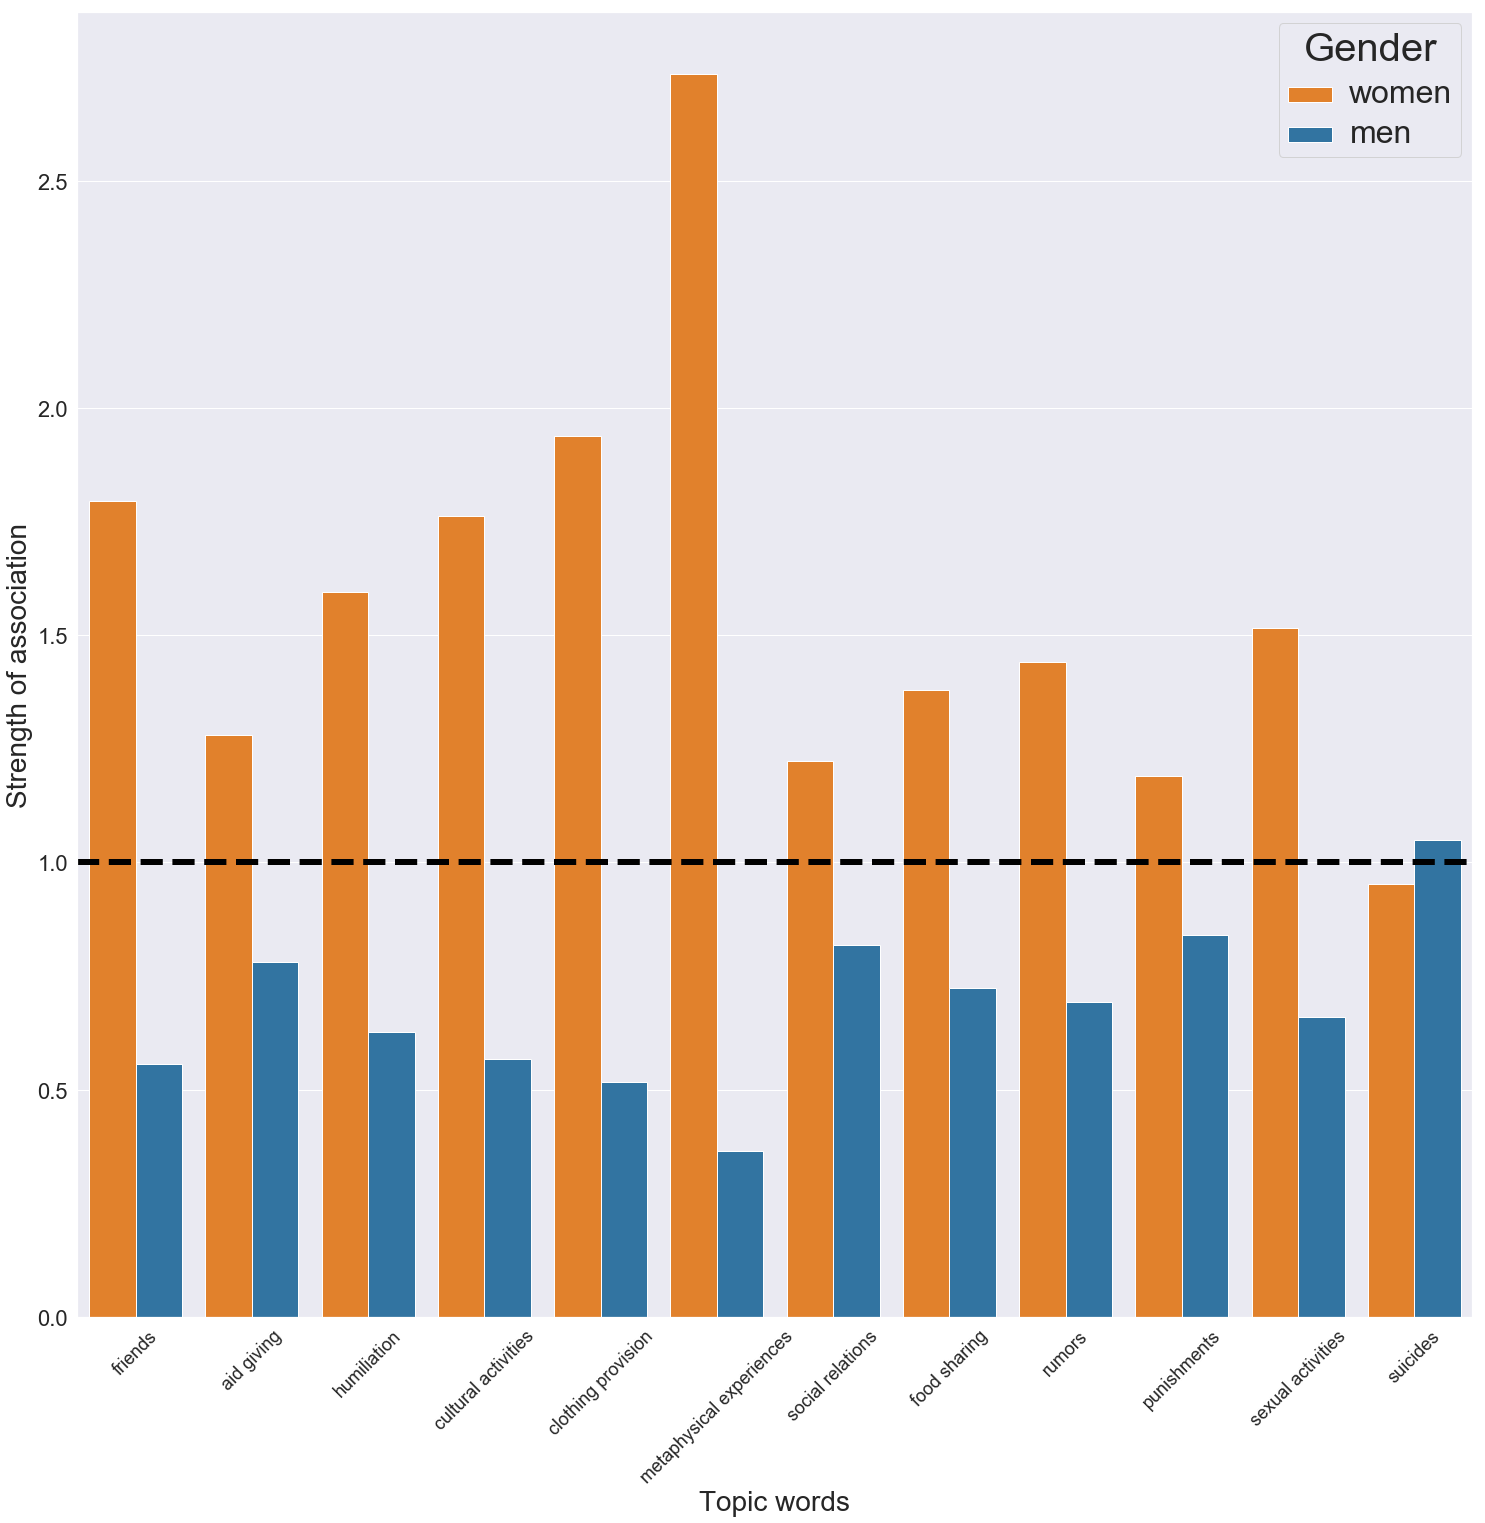

In [103]:
relevant_terms = ["food sharing","friends","social relations","aid giving","clothing provision","rumors","cultural activities","metaphysical experiences","humiliation","suicides","punishments","sexual activities","physical conditions",]
#relevant_terms = ["social bonds","aid giving","rumors","camp cultural activities","living conditions","separation"]
plot_table = df_fisher_expanded[df_fisher_expanded.topic_word.isin(relevant_terms)][['topic_word','complete_w','complete_m']]
#plot_table = df_fisher[(df_fisher.complete_w>1)&(df_fisher.significance==True)][['topic_word','complete_w','complete_m']]

plot_table = plot_table.rename(columns={"complete_w": "women", "complete_m": "men"})

plot_table = pd.melt(plot_table, id_vars=['topic_word'], value_vars=['women','men'])

plot_table = plot_table.rename(columns={"variable": "Gender"})

import seaborn as sns
import matplotlib.pyplot as plt

palette ={"women": "#ff7f0e", "men": "#1f77b4"}
sns.set(font_scale=2) 
plt.figure(figsize=(25, 24))
chart = sns.barplot(x="topic_word", 
            y="value", 
            hue="Gender", 
            data=plot_table,palette=palette)



chart.axhline(1,linestyle="--",linewidth=6,c='black')
plt.ylabel("Strength of association", size=28)
plt.xlabel("Topic words", size=28)

plt.setp(chart.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(chart.get_legend().get_title(), fontsize='40')
#plt.bar(range(len(plot_table)), plot_table.topic_word.to_list(), align='edge', width=0.3)
#plt.yscale("log")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize=18)
plt.savefig("Figure_2.png")

In [ ]:
relevant_terms =["uniforms","Sonderkommando prisoners","age deceptions","escape attempts","hangings","executions","beatings","forced labor","covert activities"]

In [99]:
df_fisher_expanded[(df_fisher_expanded.complete_m>1)&(df_fisher_expanded.p_value<0.05)][75:150]

,Unnamed: 0,topic_word,p_value,complete_w,complete_m,count_complete_w,count_complete_m,significance
148,111,Polish civilian laborers,0.016807,0.308653,3.239884,7,10,True
151,368,forced march deaths,0.017498,0.412868,2.422079,15,16,True
153,479,mass execution coverups,0.020052,0.367321,2.722415,10,12,True
154,62,Holocaust education,0.021698,0.294036,3.400939,6,9,True
155,438,identity concealment,0.022024,0.463388,2.158019,20,19,True
156,54,German prisoners,0.022378,0.513211,1.948517,28,24,True
157,89,Jewish religious holidays,0.022378,0.513211,1.948517,28,24,True
158,283,escape discussions,0.024097,0.411147,2.432217,14,15,True
159,179,body searches,0.025154,0.486664,2.054807,21,19,True
163,97,Jewish soldiers,0.028154,0.220710,4.530834,3,6,True


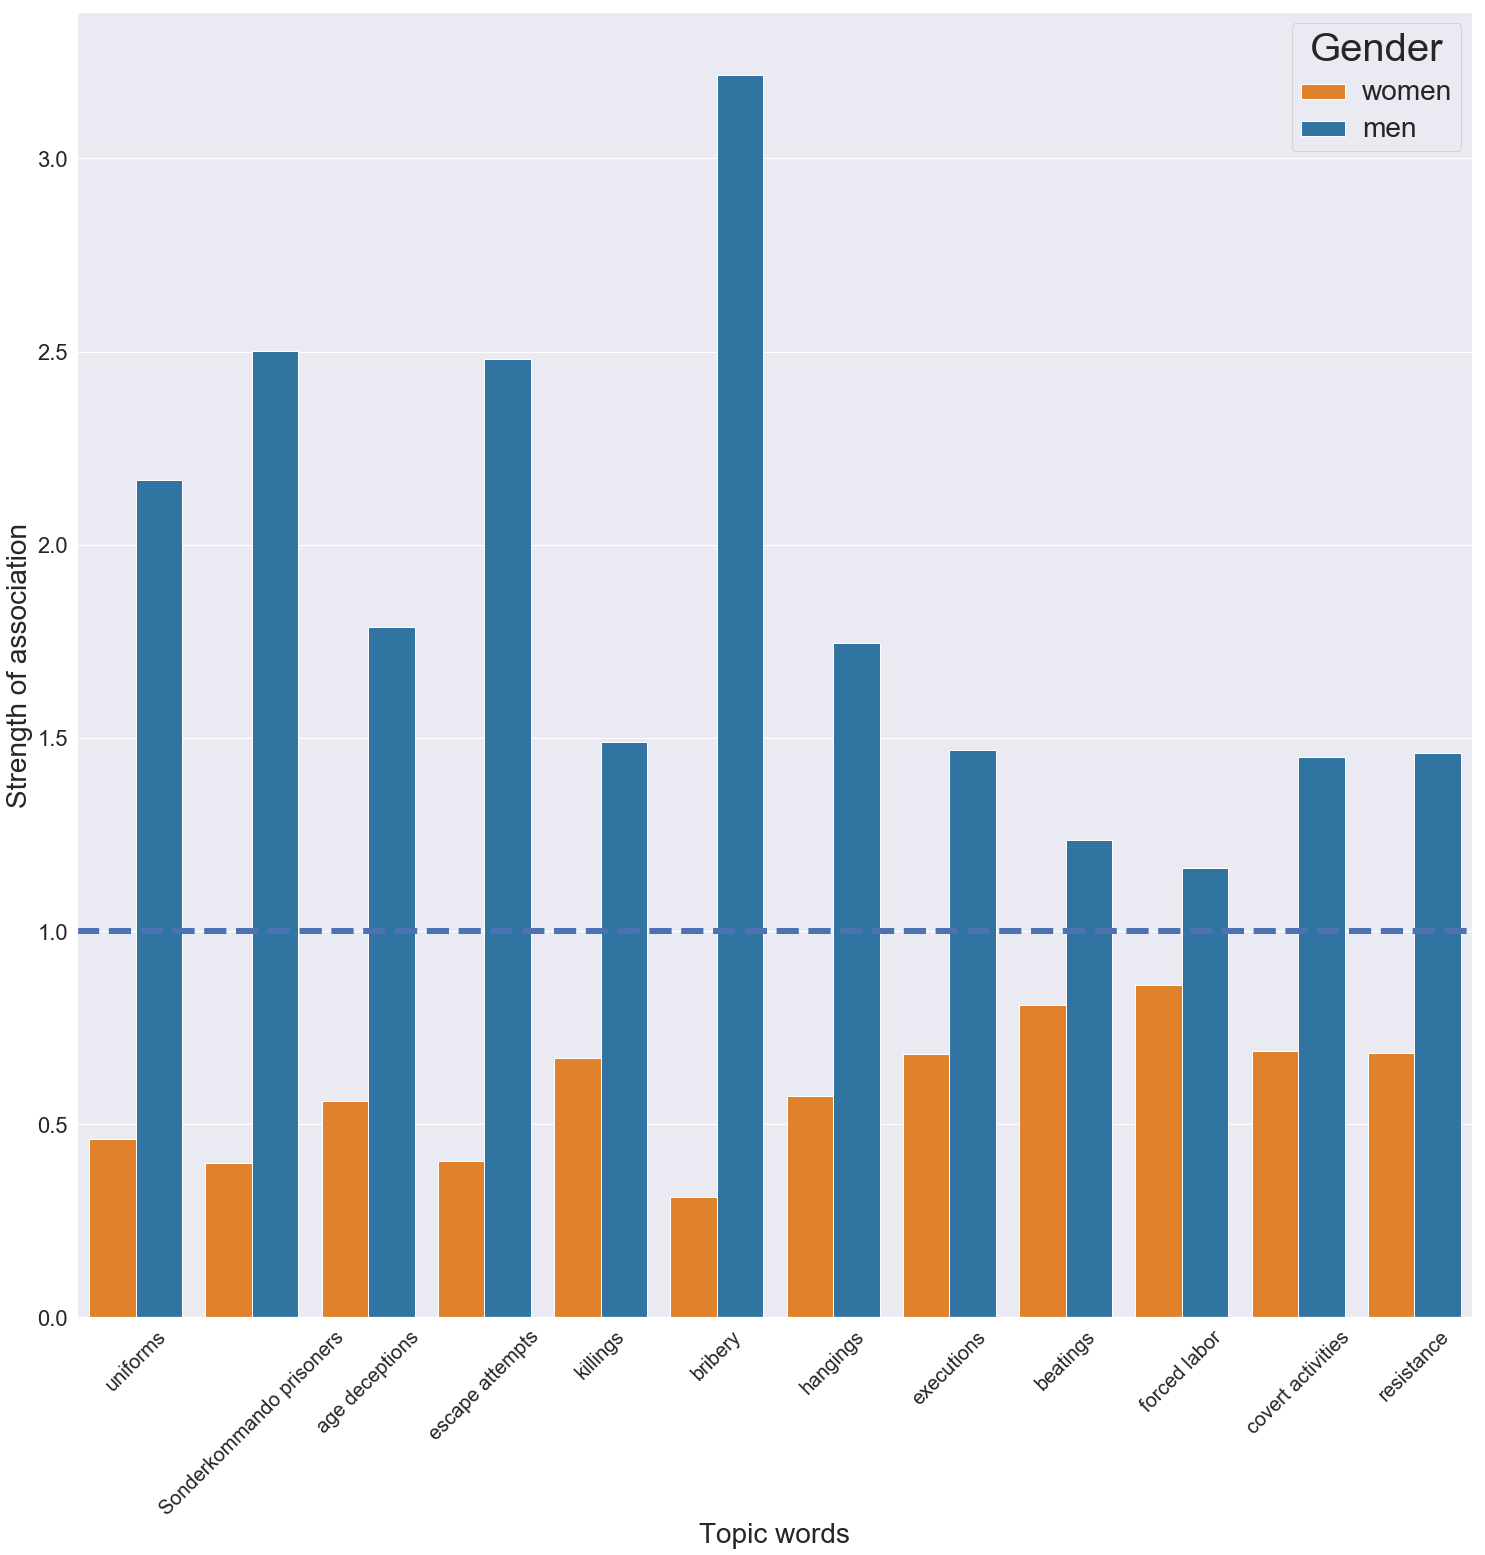

In [111]:
#relevant_terms = ["black market activities","covert economic activities","bribery","smuggling","resistance activities","hangings","covert activities"]
relevant_terms = ["bribery","covert activities","resistance","killings","uniforms","Sonderkommando prisoners","age deceptions","escape attempts","hangings","executions","beatings","forced labor","covert activities"]

plot_table = df_fisher_expanded[df_fisher_expanded.topic_word.isin(relevant_terms)][['topic_word','complete_w','complete_m']]

plot_table = plot_table.rename(columns={"complete_w": "women", "complete_m": "men"})

plot_table = pd.melt(plot_table, id_vars=['topic_word'], value_vars=['women','men'])

plot_table = plot_table.rename(columns={"variable": "Gender"})



import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2) 
plt.figure(figsize=(25, 24))
chart = sns.barplot(x="topic_word", 
            y="value", 
            hue="Gender", 
            data=plot_table,palette=palette)
plt.ylabel("Strength of association", size=28)
plt.xlabel("Topic words", size=28)
chart.axhline(1,linestyle="--",linewidth=6)
plt.setp(chart.get_legend().get_texts(), fontsize='28') # for legend text
plt.setp(chart.get_legend().get_title(), fontsize='40')
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize=20)



In [102]:
len(relevant_terms)

12

## Interpretation

The probabilities that we hear women recalling memories of solidarity and sociability are higher than the probabilities that we hear men discussing these topics. The measuring of the strength of association between these topics and gender produced the similar result. Topics of solidarity and sociability are significantly more associated with women than with men.

Interestingly, topics expressing more intimate forms of solidarity and sociability (food sharing and friendship) are also more likely to be mentioned by women and men. The probability that we hear a woman discussing friendship when recalling her stay in Birkenau is by 73% higher. The probability that we hear a woman discussing food sharing when recalling her stay in Birkenau is by 30% higher. The measurement of strength of association between gender and these topics also brought about similar results.

All this suggests that acts of solidarity and social interactions were more likely to take place among women than among men in Birkenau. Specifically, more intimate forms of sociability and solidarity were more likely among women than among men.